<a href="https://colab.research.google.com/github/rafaellima13/Churn_simplificado/blob/main/Rafael_Lima_Exerc%C3%ADcios_Pr%C3%A1ticos_Churn_(simplificado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

In [27]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import io

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rafaellima13/Churn_simplificado/main/churn%20-%20churn.csv.csv'

dados = pd.read_csv(url)
dados.head()


,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [2]:
info = dados.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [3]:
import plotly.express as px

In [4]:
px.histogram(dados, x = 'churn', text_auto = True)

In [5]:
px.histogram(dados, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

In [6]:
px.histogram(dados, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [7]:
px.box(dados, x = 'id_cliente', color = 'churn')

In [8]:
px.box(dados, x = 'score_credito', color = 'churn')

In [9]:
px.box(dados, x = 'idade', color = 'churn')

In [11]:
px.box(dados, x = 'anos_de_cliente', color = 'churn')

In [12]:
px.box(dados, x = 'saldo', color = 'churn')

In [13]:
px.box(dados, x = 'servicos_adquiridos', color = 'churn')

In [14]:
px.box(dados, x = 'tem_cartao_credito', color = 'churn')

In [15]:
px.box(dados, x = 'membro_ativo', color = 'churn')

In [17]:
px.box(dados, x = 'salario_estimado', color = 'churn')

### Desafio 4:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [18]:
x = dados.drop('churn', axis = 1)
y = dados['churn']

### Desafio 5:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
#transforma apenas x = features
one_hot = OneHotEncoder(drop= 'if_binary')
transformer = make_column_transformer((one_hot, ['pais', 'sexo_biologico']),
                                      remainder='passthrough', sparse_threshold=0)

In [21]:
linhas = transformer.fit_transform(x)
colunas = transformer.get_feature_names_out()
x_onehot = pd.DataFrame(linhas, columns = colunas)

In [22]:
transformer.get_feature_names_out()

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher', 'remainder__id_cliente',
       'remainder__score_credito', 'remainder__idade',
       'remainder__anos_de_cliente', 'remainder__saldo',
       'remainder__servicos_adquiridos', 'remainder__tem_cartao_credito',
       'remainder__membro_ativo', 'remainder__salario_estimado'],
      dtype=object)

### Desafio 6:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label = LabelEncoder()
y_label = label.fit_transform(y)
y_label

array([1, 0, 1, ..., 1, 1, 0])

In [25]:
#para transformar em dataframe
y = pd.DataFrame(y, columns = ['churn'])

### Desafio 7:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
# Divida os dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(x_onehot, y_label, test_size = 0.2, random_state = 42, stratify = y_label)

# Crie uma instância do modelo que você deseja usar
model = LogisticRegression()  # Substitua pelo modelo desejado

# Treine o modelo
model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.7965


### Desafio 8:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [29]:
from sklearn.dummy import DummyClassifier

In [51]:
dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(X_train, y_train)
dummy_stratified.score(X_test, y_test)
acuracia_dummy_scaled = dummy_stratified.score(X_test, y_test) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia_dummy_scaled) #imprime acuracia

A acurácia do dummy stratified foi 67.45%


### Desafio 9:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [32]:
from sklearn.tree import DecisionTreeClassifier

A acurácia da árvore de decisão foi 85.10%


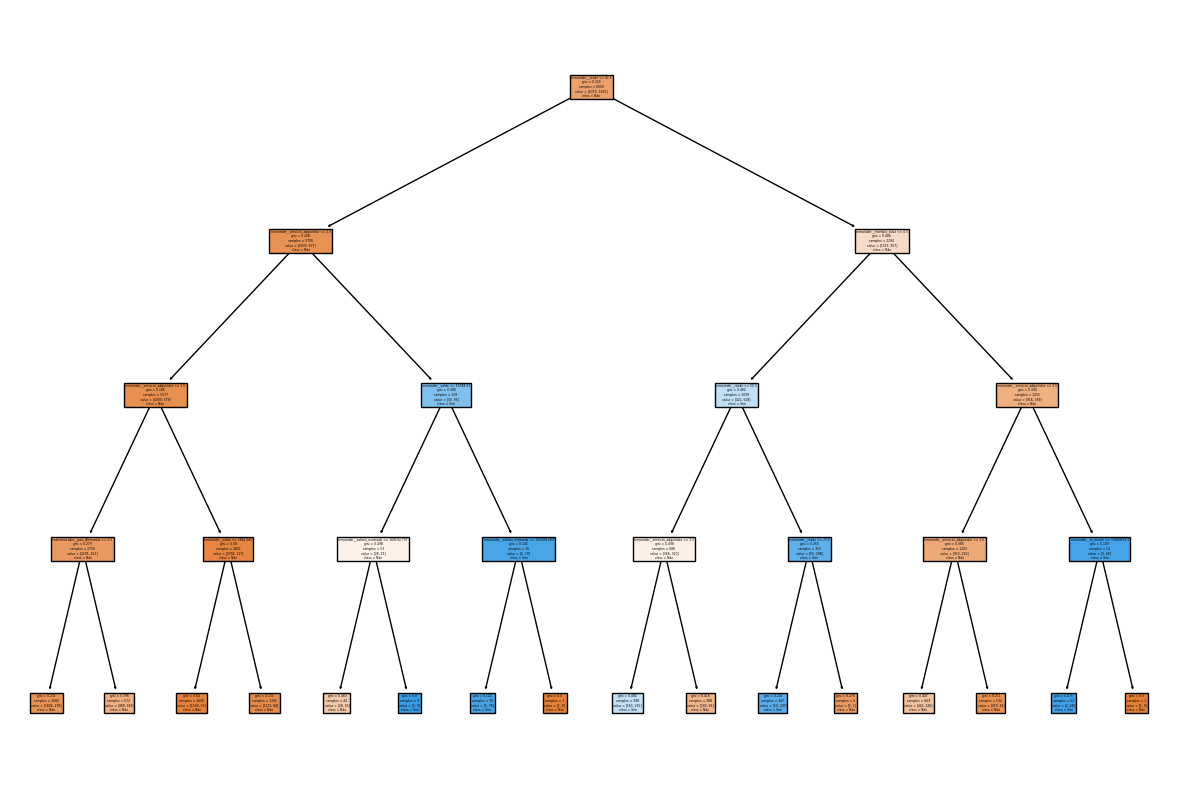

In [52]:
import matplotlib.pyplot as plt
# Árvore de Decisão
arvore = DecisionTreeClassifier(max_depth=4)      # Criar modelo
arvore.fit(X_train, y_train)  # Treina modelo
acuracia_arvore_scaled = arvore.score(X_test, y_test) * 100 # teste modelo (acurácia)
print("A acurácia da árvore de decisão foi %.2f%%" % acuracia_arvore_scaled) #imprime acurácia

plt.figure(figsize=(15, 10))
plot_tree(arvore, filled=True, class_names=['Não', 'Sim'], feature_names=x_onehot.columns);


### Desafio 10:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Crie uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Ajuste o scaler aos dados de treinamento e transforme-os
X_train_scaled = scaler.fit_transform(X_train)

# Transforme os dados de teste usando o scaler ajustado aos dados de treinamento
X_test_scaled = scaler.transform(X_test)


### Desafio 11:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
acuracia_knn_scaled = knn.score(X_test_scaled, y_test) * 100
print("A acurácia do KNN com dados normalizados foi %.2f%%" % acuracia_knn_scaled)

A acurácia do KNN com dados normalizados foi 81.00%


### Desafio 12:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [53]:
# Comparando as acurácias
print("Acurácia do Dummy Stratified (normalizado):", acuracia_dummy_scaled)
print("Acurácia da Árvore de Decisão (normalizado):", acuracia_arvore_scaled)
print("Acurácia do KNN (normalizado):", acuracia_knn_scaled)

# Encontrando o melhor modelo
melhor_modelo = max(acuracia_dummy_scaled, acuracia_arvore_scaled, acuracia_knn_scaled)

if melhor_modelo == acuracia_dummy_scaled:
  print("O melhor modelo foi o Dummy Stratified (normalizado).")
elif melhor_modelo == acuracia_arvore_scaled:
  print("O melhor modelo foi a Árvore de Decisão (normalizado).")
else:
  print("O melhor modelo foi o KNN (normalizado).")

Acurácia do Dummy Stratified (normalizado): 67.45
Acurácia da Árvore de Decisão (normalizado): 85.1
Acurácia do KNN (normalizado): 81.0
O melhor modelo foi a Árvore de Decisão (normalizado).


### Desafio 13:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```
